In [262]:
import numpy as np #수치 계산
import pandas as pd #행, 열의 표와 같은 데이터 다루기
import matplotlib.pyplot as plt #그래프를 통한 시각화
import seaborn as sns 

### 학습목표
- 공공데이터를 활용한 데이터 분석 및 시각화

##### '전국공공시설개방정보표준데이터'
지방자치단체 등에서 관리하는 공공시설 및 체육시설의 유휴공간 개방 및 이용에 대한 정보 데이터 

In [263]:
# 한글 인코딩 코드 
plt.rc('font' , family = 'Malgun Gothic')


In [264]:
data = pd.read_csv('./data/전국공공시설개방정보표준데이터.csv', encoding = 'cp949')
#cp949 : EUC-KR을 확장한 인코딩 방식

# 데이터 확인하기

In [265]:
data.shape

(7142, 29)

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7142 entries, 0 to 7141
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방시설명     7142 non-null   object 
 1   개방장소명     7142 non-null   object 
 2   개방시설유형구분  7142 non-null   object 
 3   휴관일       7142 non-null   object 
 4   평일운영시작시각  7142 non-null   object 
 5   평일운영종료시각  7142 non-null   object 
 6   주말운영시작시각  7142 non-null   object 
 7   주말운영종료시각  7142 non-null   object 
 8   유료사용여부    7142 non-null   object 
 9   사용기준시간    3551 non-null   float64
 10  사용료       3403 non-null   object 
 11  초과사용단위시간  1977 non-null   float64
 12  초과사용료     1754 non-null   object 
 13  수용가능인원수   4362 non-null   float64
 14  면적        4342 non-null   object 
 15  부대시설정보    2947 non-null   object 
 16  신청방법구분    5256 non-null   object 
 17  시설사진정보    1207 non-null   object 
 18  소재지도로명주소  6336 non-null   object 
 19  소재지지번주소   4736 non-null   object 
 20  관리기관명     7142 non-null   obje

#### 결측치를 확인해보기. 

In [267]:
#결측치 수 확인 
data_nan = data.isnull().sum()
data_nan

개방시설명          0
개방장소명          0
개방시설유형구분       0
휴관일            0
평일운영시작시각       0
평일운영종료시각       0
주말운영시작시각       0
주말운영종료시각       0
유료사용여부         0
사용기준시간      3591
사용료         3739
초과사용단위시간    5165
초과사용료       5388
수용가능인원수     2780
면적          2800
부대시설정보      4195
신청방법구분      1886
시설사진정보      5935
소재지도로명주소     806
소재지지번주소     2406
관리기관명          0
담당부서명       1262
사용안내전화번호     876
홈페이지주소      2891
위도             0
경도             0
데이터기준일자        0
제공기관코드         0
제공기관명          0
dtype: int64

<Axes: >

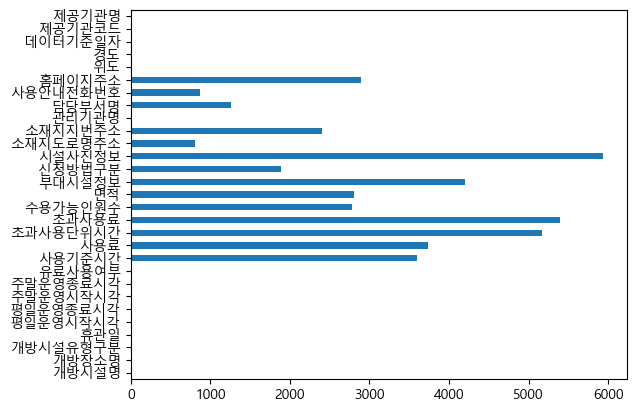

In [268]:
#막대그래프 시각화, 
#pandas 플럿 함수 이용해서 시각화 하기 
data_nan.plot(kind='barh')

<Axes: >

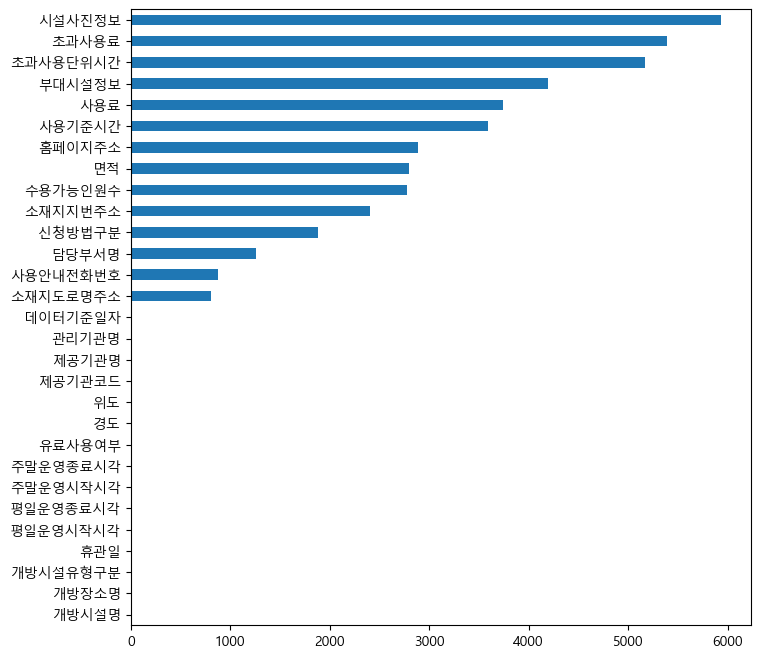

In [269]:
#값을 정렬해서 결측치가 많은 순서대로 확인하기 
data_nan.sort_values().plot(kind='barh'
                            ,figsize =(8,8))

# 데이터 전처리
 - 전처리 후 시각화
 - 주소 정보 통합

In [270]:
pd.set_option ( 'display.max_columns' , None )
data.head(1)

,개방시설명,개방장소명,개방시설유형구분,휴관일,평일운영시작시각,평일운영종료시각,주말운영시작시각,주말운영종료시각,유료사용여부,사용기준시간,사용료,초과사용단위시간,초과사용료,수용가능인원수,면적,부대시설정보,신청방법구분,시설사진정보,소재지도로명주소,소재지지번주소,관리기관명,담당부서명,사용안내전화번호,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,우리누리청소년문화센터 도서관,우리누리청소년문화센터,기타,"매월 2째주, 4째주 일요일",10:00,19:00,10:00,18:00,N,NaN,NaN,NaN,NaN,50.0,118,NaN,NaN,NaN,경상남도 창원시 마산회원구 팔용로 128,경상남도 창원시 마산회원구 합성동 91-3,창원시설공단,우리누리청소년문화센터,055-712-0320,www.cwsisul.or.kr,35.240104,128.590761,2020-12-02,B553892,창원시설공단


In [271]:
#주소 정보 가지고오기 
#도로명과 건물번호를 사용하는 주소 ㅊㅔ계 
data['소재지도로명주소'] #기본으로 사용, 결측치는 '지번주소'로 대채

0           경상남도 창원시 마산회원구 팔용로 128
1           경상남도 창원시 마산회원구 팔용로 128
2           경상남도 창원시 마산회원구 팔용로 128
3           경상남도 창원시 마산회원구 팔용로 128
4              경상남도 창원시 의창구 두대로 97
                   ...            
7137       인천광역시 연수구 아트센터대로97번길 76
7138    대구광역시 달서구 감삼북길 119-10(감삼동)
7139      대구광역시 달서구 와룡로56길 26(죽전동)
7140      대구광역시 달서구 와룡로56길 26(죽전동)
7141        대구광역시 달서구 장기로 277(장기동)
Name: 소재지도로명주소, Length: 7142, dtype: object

In [272]:
#땅에 부여된 번호인 지번을 사용하는 주소 체계
data['소재지지번주소']

0       경상남도 창원시 마산회원구 합성동 91-3
1       경상남도 창원시 마산회원구 합성동 91-3
2       경상남도 창원시 마산회원구 합성동 91-3
3       경상남도 창원시 마산회원구 합성동 91-3
4          경상남도 창원시 의창구 삼동동 293
                 ...           
7137        인천광역시 연수구 송도동 18-10
7138                        NaN
7139                        NaN
7140                        NaN
7141                        NaN
Name: 소재지지번주소, Length: 7142, dtype: object

In [273]:
#둘 다 결측치인 데이터가 있을까? -> 찾아보기
data['소재지도로명주소'].isnull() 

0       False
1       False
2       False
3       False
4       False
        ...  
7137    False
7138    False
7139    False
7140    False
7141    False
Name: 소재지도로명주소, Length: 7142, dtype: bool

In [274]:
data['소재지지번주소'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7137    False
7138     True
7139     True
7140     True
7141     True
Name: 소재지지번주소, Length: 7142, dtype: bool

In [275]:
#A조건도 맞고 B조건도 맞는 걸 뽑기 
data['소재지도로명주소'].isnull() & data['소재지지번주소'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7137    False
7138    False
7139    False
7140    False
7141    False
Length: 7142, dtype: bool

In [276]:
data[ data['소재지도로명주소'].isnull() & data['소재지지번주소'].isnull() ]
#둘다 결측치인 데이터는 없음. 

,개방시설명,개방장소명,개방시설유형구분,휴관일,평일운영시작시각,평일운영종료시각,주말운영시작시각,주말운영종료시각,유료사용여부,사용기준시간,사용료,초과사용단위시간,초과사용료,수용가능인원수,면적,부대시설정보,신청방법구분,시설사진정보,소재지도로명주소,소재지지번주소,관리기관명,담당부서명,사용안내전화번호,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명


In [277]:
data['소재지도로명주소']= data['소재지도로명주소'].fillna(data['소재지지번주소'])

In [278]:
#소재지도로명주소 가져오기 
#결측값이 잘 채워졌는지 확인 
data[data['소재지도로명주소'].isnull()]

,개방시설명,개방장소명,개방시설유형구분,휴관일,평일운영시작시각,평일운영종료시각,주말운영시작시각,주말운영종료시각,유료사용여부,사용기준시간,사용료,초과사용단위시간,초과사용료,수용가능인원수,면적,부대시설정보,신청방법구분,시설사진정보,소재지도로명주소,소재지지번주소,관리기관명,담당부서명,사용안내전화번호,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명


In [279]:
#소재지지번주소 삭제 
data.drop('소재지지번주소', axis = 1, inplace = True)

In [280]:
data.shape

(7142, 28)

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7142 entries, 0 to 7141
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방시설명     7142 non-null   object 
 1   개방장소명     7142 non-null   object 
 2   개방시설유형구분  7142 non-null   object 
 3   휴관일       7142 non-null   object 
 4   평일운영시작시각  7142 non-null   object 
 5   평일운영종료시각  7142 non-null   object 
 6   주말운영시작시각  7142 non-null   object 
 7   주말운영종료시각  7142 non-null   object 
 8   유료사용여부    7142 non-null   object 
 9   사용기준시간    3551 non-null   float64
 10  사용료       3403 non-null   object 
 11  초과사용단위시간  1977 non-null   float64
 12  초과사용료     1754 non-null   object 
 13  수용가능인원수   4362 non-null   float64
 14  면적        4342 non-null   object 
 15  부대시설정보    2947 non-null   object 
 16  신청방법구분    5256 non-null   object 
 17  시설사진정보    1207 non-null   object 
 18  소재지도로명주소  7142 non-null   object 
 19  관리기관명     7142 non-null   object 
 20  담당부서명     5880 non-null   obje

# 파생변수 생성
 - 주소 => 시도, 시구군 컬럼 생성

In [282]:
data['소재지도로명주소'].str.split()
#문자열 중 띄어쓰기로 나눌 거임 

0          [경상남도, 창원시, 마산회원구, 팔용로, 128]
1          [경상남도, 창원시, 마산회원구, 팔용로, 128]
2          [경상남도, 창원시, 마산회원구, 팔용로, 128]
3          [경상남도, 창원시, 마산회원구, 팔용로, 128]
4             [경상남도, 창원시, 의창구, 두대로, 97]
                     ...               
7137       [인천광역시, 연수구, 아트센터대로97번길, 76]
7138    [대구광역시, 달서구, 감삼북길, 119-10(감삼동)]
7139      [대구광역시, 달서구, 와룡로56길, 26(죽전동)]
7140      [대구광역시, 달서구, 와룡로56길, 26(죽전동)]
7141        [대구광역시, 달서구, 장기로, 277(장기동)]
Name: 소재지도로명주소, Length: 7142, dtype: object

In [283]:
#분리된 문자열을 컬럼으로하는 df 반환 
data['소재지도로명주소'].str.split(expand = True )

,0,1,2,3,4,5,6,7,8
0,경상남도,창원시,마산회원구,팔용로,128,None,None,None,None
1,경상남도,창원시,마산회원구,팔용로,128,None,None,None,None
2,경상남도,창원시,마산회원구,팔용로,128,None,None,None,None
3,경상남도,창원시,마산회원구,팔용로,128,None,None,None,None
4,경상남도,창원시,의창구,두대로,97,None,None,None,None
...,...,...,...,...,...,...,...,...,...
7137,인천광역시,연수구,아트센터대로97번길,76,None,None,None,None,None
7138,대구광역시,달서구,감삼북길,119-10(감삼동),None,None,None,None,None
7139,대구광역시,달서구,와룡로56길,26(죽전동),None,None,None,None,None
7140,대구광역시,달서구,와룡로56길,26(죽전동),None,None,None,None,None


In [284]:
#
data['소재지도로명주소'].str.split(expand = True )[0]

0        경상남도
1        경상남도
2        경상남도
3        경상남도
4        경상남도
        ...  
7137    인천광역시
7138    대구광역시
7139    대구광역시
7140    대구광역시
7141    대구광역시
Name: 0, Length: 7142, dtype: object

In [285]:
# '시도', ;시구군; 컬럼 생성
data['시도']=data['소재지도로명주소'].str.split(expand = True )[0]

In [286]:
data['시군구']=data['소재지도로명주소'].str.split(expand = True )[1]

In [287]:
data.head(1)

,개방시설명,개방장소명,개방시설유형구분,휴관일,평일운영시작시각,평일운영종료시각,주말운영시작시각,주말운영종료시각,유료사용여부,사용기준시간,사용료,초과사용단위시간,초과사용료,수용가능인원수,면적,부대시설정보,신청방법구분,시설사진정보,소재지도로명주소,관리기관명,담당부서명,사용안내전화번호,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명,시도,시군구
0,우리누리청소년문화센터 도서관,우리누리청소년문화센터,기타,"매월 2째주, 4째주 일요일",10:00,19:00,10:00,18:00,N,NaN,NaN,NaN,NaN,50.0,118,NaN,NaN,NaN,경상남도 창원시 마산회원구 팔용로 128,창원시설공단,우리누리청소년문화센터,055-712-0320,www.cwsisul.or.kr,35.240104,128.590761,2020-12-02,B553892,창원시설공단,경상남도,창원시


In [288]:
#시도별 공공시설 수 확인 
data['시도'].value_counts()

시도
경기도        1682
서울특별시       818
경상남도        788
경상북도        570
충청남도        508
강원특별자치도     378
전라남도        374
인천광역시       343
광주광역시       340
충청북도        297
대구광역시       275
전북특별자치도     202
부산광역시       149
울산광역시       149
제주특별자치도     107
대전광역시        88
세종특별자치시      55
전라북도         11
강원도           6
울산            2
Name: count, dtype: int64

In [289]:
#같은 의미 데이터 합치기(울산, 강원도, 전북)
#강원도 -> 강원특별자치'시
#'시도'에서 '강원도' 데이터 확인 ]
data[data['시도']=='강원도'][ ['데이터기준일자','소재지도로명주소']]

,데이터기준일자,소재지도로명주소
2124,2019-04-17,강원도 동해시 덕골길10
2125,2019-04-17,강원도 동해시 덕골길10
2126,2019-04-17,강원도 동해시 덕골길10
2127,2019-04-17,강원도 동해시 덕골길10
2128,2019-04-17,강원도 동해시 덕골길10
2129,2019-04-17,강원도 동해시 덕골길10


In [290]:
#강원도 -> 강원특별자치
#문자열을 바꾸는 함수 replace
data['시도']=  data['시도'].str.replace('강원도','강원특별자치도')

In [291]:
data['시도'].value_counts()

시도
경기도        1682
서울특별시       818
경상남도        788
경상북도        570
충청남도        508
강원특별자치도     384
전라남도        374
인천광역시       343
광주광역시       340
충청북도        297
대구광역시       275
전북특별자치도     202
부산광역시       149
울산광역시       149
제주특별자치도     107
대전광역시        88
세종특별자치시      55
전라북도         11
울산            2
Name: count, dtype: int64

In [292]:
data[data['시도']=='울산']

,개방시설명,개방장소명,개방시설유형구분,휴관일,평일운영시작시각,평일운영종료시각,주말운영시작시각,주말운영종료시각,유료사용여부,사용기준시간,사용료,초과사용단위시간,초과사용료,수용가능인원수,면적,부대시설정보,신청방법구분,시설사진정보,소재지도로명주소,관리기관명,담당부서명,사용안내전화번호,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명,시도,시군구
399,삼산풋살경기장(평일),삼산풋살경기장,풋살경기장,"매주 월요일, 1월 1일, 설·추석 당일",06:00,22:00,06:00,22:00,Y,NaN,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,울산 남구 화합로 224-27,울산광역시 남구도시관리공단,NaN,052-226-0962,NaN,35.544742,129.342513,2019-10-02,B551974,울산광역시남구도시관리공단,울산,남구
400,삼산풋살경기장(주말),삼산풋살경기장,풋살경기장,"매주 월요일, 1월 1일, 설·추석 당일",06:00,22:00,06:00,22:00,Y,NaN,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,울산 남구 화합로 224-27,울산광역시 남구도시관리공단,NaN,052-226-0962,NaN,35.544742,129.342513,2019-10-02,B551974,울산광역시남구도시관리공단,울산,남구


In [293]:
data['시도']=data['시도'].str.replace('울산광역시광역시','울산광역시')
data['시도'].value_counts()

시도
경기도        1682
서울특별시       818
경상남도        788
경상북도        570
충청남도        508
강원특별자치도     384
전라남도        374
인천광역시       343
광주광역시       340
충청북도        297
대구광역시       275
전북특별자치도     202
부산광역시       149
울산광역시       149
제주특별자치도     107
대전광역시        88
세종특별자치시      55
전라북도         11
울산            2
Name: count, dtype: int64

In [294]:
data['시도']=data['시도'].str.replace('전라북도','전북특별자치도')
data['시도'].value_counts()

시도
경기도        1682
서울특별시       818
경상남도        788
경상북도        570
충청남도        508
강원특별자치도     384
전라남도        374
인천광역시       343
광주광역시       340
충청북도        297
대구광역시       275
전북특별자치도     213
울산광역시       149
부산광역시       149
제주특별자치도     107
대전광역시        88
세종특별자치시      55
울산            2
Name: count, dtype: int64

In [295]:
city_sort = data['시도'].value_counts()

city_sort

시도
경기도        1682
서울특별시       818
경상남도        788
경상북도        570
충청남도        508
강원특별자치도     384
전라남도        374
인천광역시       343
광주광역시       340
충청북도        297
대구광역시       275
전북특별자치도     213
울산광역시       149
부산광역시       149
제주특별자치도     107
대전광역시        88
세종특별자치시      55
울산            2
Name: count, dtype: int64

<BarContainer object of 18 artists>

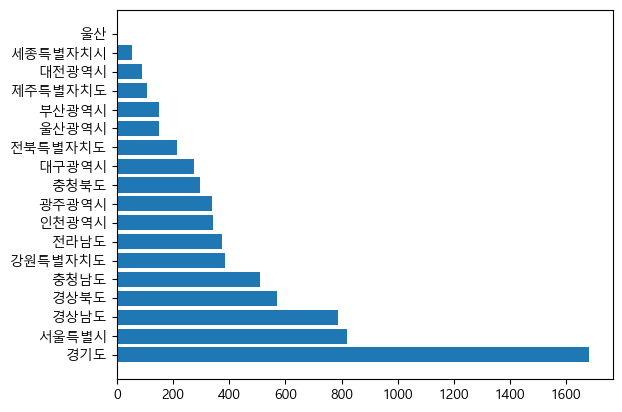

In [296]:
x=city_sort.index
y=city_sort.values
plt.barh (x,y)


C:\Users\152\AppData\Local\Temp\ipykernel_10532\374597755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( data = data, y = '시도', order = city_sort.index, palette='Greens_r')


<Axes: xlabel='count', ylabel='시도'>

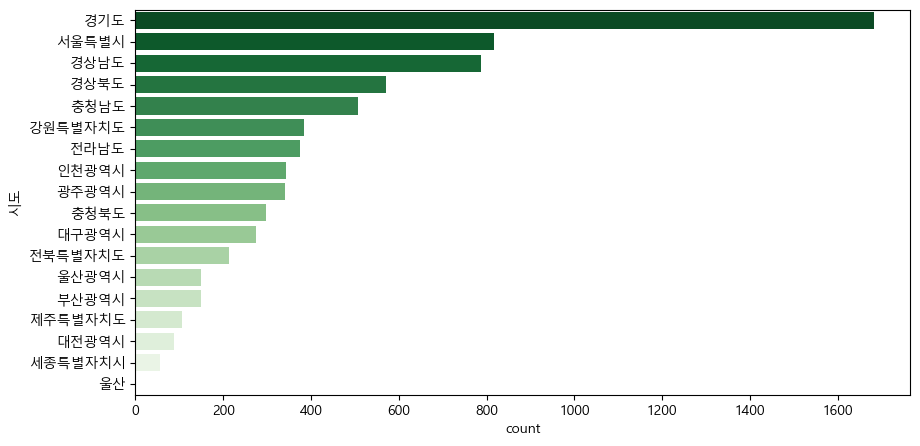

In [297]:
#sns 활용해서 막대 그래프 그리기
plt.figure(figsize=(10,5))
sns.countplot( data = data, y = '시도', order = city_sort.index, palette='Greens_r')

### 텍스트 데이터 다루기 
- 부대시설정보 컬러
- 텍스트 데이터의 빈도 확인
- 여러 텍스트가 ',' , '+'등의 특수문자로 구분되어 있음

### 정규표현식
- 문자열의 특정 패턴을 찾거나 바꾸기 위한 문법 체계
- 이메일 주소, 전화번호 등 규칙이 있는 문자열을 다룰 때 유용

In [298]:
import re

In [299]:
data['부대시설정보']

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4       영상시설,피아노,음향, 조명,냉난방
               ...         
7137                    NaN
7138                    NaN
7139                    NaN
7140                    NaN
7141                    NaN
Name: 부대시설정보, Length: 7142, dtype: object

In [300]:
#부대시설정보 컬럼을 리스트로 변환 
facility = data['부대시설정보'].tolist()
facility

[nan,
 nan,
 nan,
 nan,
 '영상시설,피아노,음향, 조명,냉난방',
 '냉난방',
 '사물함',
 '사물함',
 '스크린+빔프로젝터+음향시설+책상+의자',
 '스크린+빔프로젝터+책상+의자',
 '책상+의자',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '칠판+책상+의자',
 '칠판+책상+의자',
 '빔프로젝터+ 마이크',
 '칠판+책상+의자',
 '칠판+책상+의자',
 nan,
 nan,
 nan,
 nan,
 '빔프로젝터+음향장비',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '책상+의자+화이트보드',
 '탁자+의자',
 '책상+의자+화이트보드',
 '책상+의자+화이트보드',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '빔프로젝트+4D 상영관+크로마키',
 '망원경',
 '4D 상영관',
 '다도체험실',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '족구장',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n

In [301]:
#str형태로 변환
facility = str(facility)

In [302]:
facility[:100]

"[nan, nan, nan, nan, '영상시설,피아노,음향, 조명,냉난방', '냉난방', '사물함', '사물함', '스크린+빔프로젝터+음향시설+책상+의자', '스크린+빔프로젝터+"

In [303]:
#간단한 문자열 기호들 삭제 
facility= facility.replace('+',',').replace(" ", ',').replace("/",",").replace("'",',')
#drop은 시리즈나 데이터 타입에서 쓰는거임 

In [304]:
facility[:500]

'[nan,,nan,,nan,,nan,,,영상시설,피아노,음향,,조명,냉난방,,,,냉난방,,,,사물함,,,,사물함,,,,스크린,빔프로젝터,음향시설,책상,의자,,,,스크린,빔프로젝터,책상,의자,,,,책상,의자,,,nan,,nan,,nan,,nan,,nan,,nan,,,칠판,책상,의자,,,,칠판,책상,의자,,,,빔프로젝터,,마이크,,,,칠판,책상,의자,,,,칠판,책상,의자,,,nan,,nan,,nan,,nan,,,빔프로젝터,음향장비,,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,,책상,의자,화이트보드,,,,탁자,의자,,,,책상,의자,화이트보드,,,,책상,의자,화이트보드,,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,nan,,,빔프로젝트,4D,상영관,크로마키,,,,망원경,,,,4D,상영관,,,,다도체험실,,,nan,,nan,,nan,,nan,,nan,,nan,,n'

In [305]:
#숫자와 .제거

#re.sub(패턴식, 대체할 문자, 텍스트)
re.sub("[\[\d\-nan\.\]]","", facility )

#[\[\d\-nan\.\]] -> 숫자와 점을 찾아라는 패턴식임. 
#맨 끝 대괄호 [ ] " 대괋 안 문자들 중 한개의 문자와 치치 
#\d: 는 숫자를 의미함 (0~9)
#\[: 기호 자체 - [
#\. \] : 기호 자체 - . 과 ]

facility = re.sub( ",{2,}" , ',', facility )
# {숫자,} :  숫자 이상만큼 반복

facility[ : 1000]

'[nan,nan,nan,nan,영상시설,피아노,음향,조명,냉난방,냉난방,사물함,사물함,스크린,빔프로젝터,음향시설,책상,의자,스크린,빔프로젝터,책상,의자,책상,의자,nan,nan,nan,nan,nan,nan,칠판,책상,의자,칠판,책상,의자,빔프로젝터,마이크,칠판,책상,의자,칠판,책상,의자,nan,nan,nan,nan,빔프로젝터,음향장비,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,책상,의자,화이트보드,탁자,의자,책상,의자,화이트보드,책상,의자,화이트보드,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,빔프로젝트,4D,상영관,크로마키,망원경,4D,상영관,다도체험실,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,족구장,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,책상,의자,칠판,책상,의자,빔프로젝터,칠판,책상,의자,빔프로젝터,책상,의자,유선마이크,앰프시설,프로젝트,빔,책상,의자,마이크,책상,무대,의자,책상,의자,유선마이크,프로젝트,빔,책상,의자,nan,조명,음향장비,조명,nan,nan,nan,nan,nan,nan,nan,nan,nan,냉난방,빔프로젝트,조

In [306]:
#pd의 Series로 변환 
#facility.split(',')
pd.Series(facility.split(',')).value_counts()

nan         4193
의자           676
책상           456
빔프로젝터        311
빔프로젝트        267
            ... 
의자25개          1
테이블5개          1
유무선마이크3개       1
개방화장실          1
옥외분전반          1
Name: count, Length: 1618, dtype: int64

In [307]:
#괄호 안의 문자 포함, 괄호 삭제
facility = re.sub("\([^()]*\)", "", facility )
facility

#\(: 소괄호 기호 자체 (
#\): 기호 자체 )
#[^()]: 괄호가 아닌 문자
#*: 문자가 0개 이상 (있을 수도 없을 수도)

'[nan,nan,nan,nan,영상시설,피아노,음향,조명,냉난방,냉난방,사물함,사물함,스크린,빔프로젝터,음향시설,책상,의자,스크린,빔프로젝터,책상,의자,책상,의자,nan,nan,nan,nan,nan,nan,칠판,책상,의자,칠판,책상,의자,빔프로젝터,마이크,칠판,책상,의자,칠판,책상,의자,nan,nan,nan,nan,빔프로젝터,음향장비,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,책상,의자,화이트보드,탁자,의자,책상,의자,화이트보드,책상,의자,화이트보드,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,빔프로젝트,4D,상영관,크로마키,망원경,4D,상영관,다도체험실,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,족구장,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,책상,의자,칠판,책상,의자,빔프로젝터,칠판,책상,의자,빔프로젝터,책상,의자,유선마이크,앰프시설,프로젝트,빔,책상,의자,마이크,책상,무대,의자,책상,의자,유선마이크,프로젝트,빔,책상,의자,nan,조명,음향장비,조명,nan,nan,nan,nan,nan,nan,nan,nan,nan,냉난방,빔프로젝트,조

In [308]:
facility_cnt = pd.Series(facility.split(',')).value_counts()
facility_cnt.head(50)

nan       4193
의자         709
책상         469
빔프로젝터      319
빔프로젝트      268
음향         258
냉난방        240
조명         223
마이크        203
화이트보드      154
음향시설       148
화장실        141
샤워실        105
음향기기       104
등          101
주차장         96
음향장비        93
스크린         90
주차가능        75
조명시설        71
피아노         64
탁자          63
야간라이트       61
빔           59
전광판         57
스피커         57
농구장         54
테이블         54
프로젝터        51
냉난방시설       50
냉난방기        50
전기          47
및           46
1면          41
칠판          40
족구장         40
무선인터넷       37
1식          36
방송장비        35
배드민턴장       33
강의용테이블      33
PC          32
인터넷         32
조명탑         32
관람석         32
컴퓨터         31
1개          31
1대          31
탈의실         30
TV          30
Name: count, dtype: int64

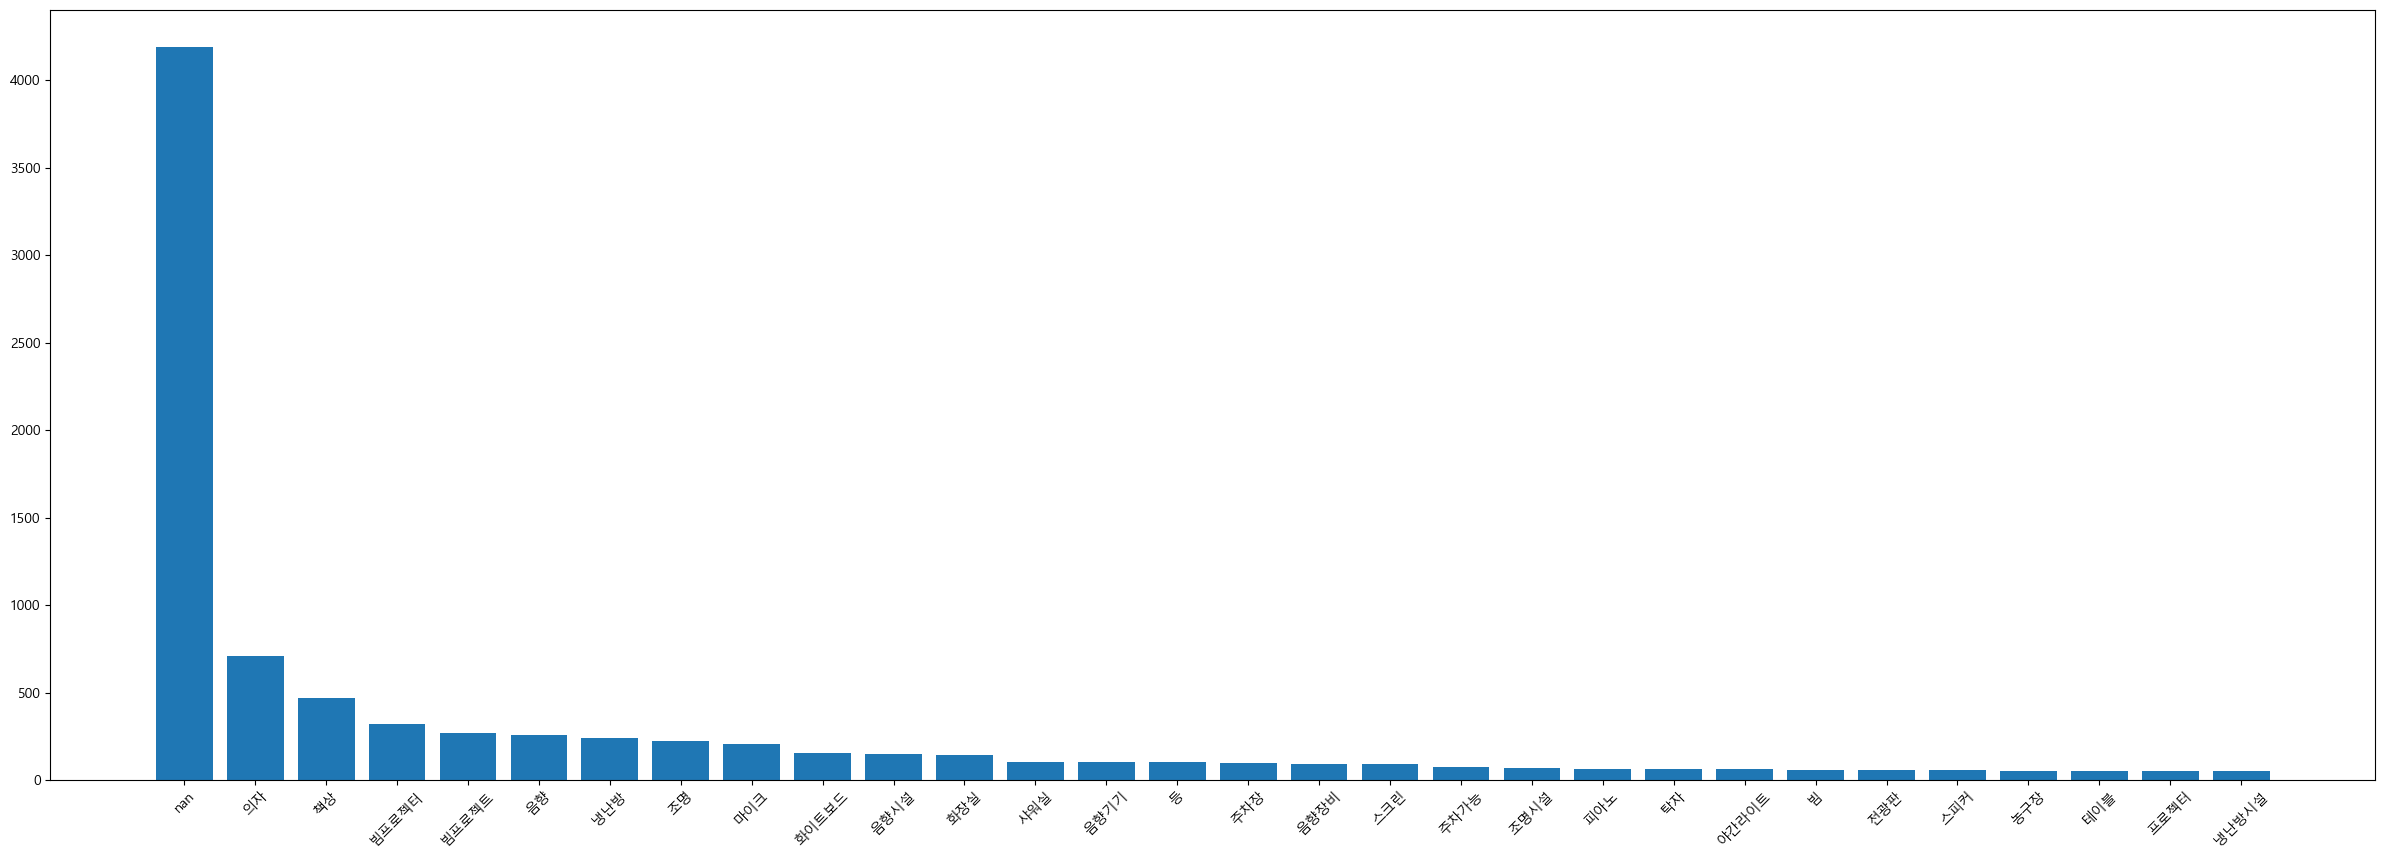

In [309]:
plt.figure(figsize=(30,10))
plt.bar(facility_cnt.head(30).index,facility_cnt.head(30).values)

plt.xticks(facility_cnt.head(30).index, rotation = 45)

plt.show()

### 워드클라우드 활용 텍스트 빈도수 표현
- 워드클라우드 : 텍스트 데이터에서 단어의 빈도수나 중요도를 시각적으로 표현하는 방법
- 빈도와 중요도에 따라 글자 크기를 달리해 핵심 키워드를 쉽게 파악 가능 

In [310]:
!pip install wordcloud

In [311]:
from wordcloud import WordCloud

In [312]:
#워드 클라우드 시각화 #객체를 생성한거임. 
word_draw = WordCloud(
    font_path = r"C:\Windows\Fonts\malgun.ttf",
    width = 1000, height = 600, #네모 박스의 크기 설정
    stopwords = ['개', '등', '면', '대', '및','nan'], #불용어(자주 사용되지만 큰 의미가 없는 단어)
    random_state =0,
    background_color='white',
    colormap = 'plasma'
)

In [313]:
#워드클라우드 생성
word_draw.generate(facility)

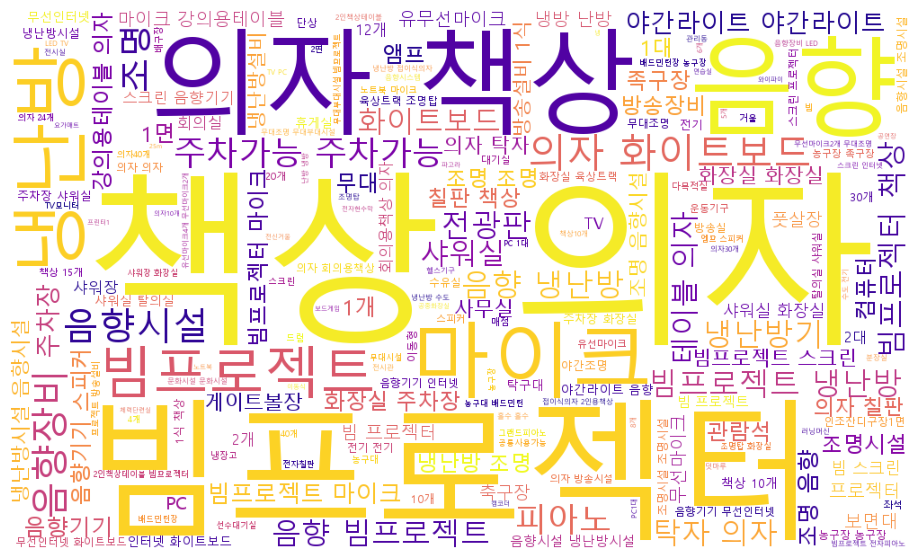

In [314]:
#이미지 보여주기
plt.figure(figsize = (15,7))
plt.imshow(word_draw)
plt.axis('off')#옆에 x,y축 닫
plt.show()

In [315]:
#커스텀 함수 만들기 
def wordcloud( data ) :
    word_draw = WordCloud(
    font_path = r"C:\Windows\Fonts\malgun.ttf",
    width = 1000, height = 600, #네모 박스의 크기 설정
    stopwords = ['개', '등', '면', '대', '및','nan'], #불용어(자주 사용되지만 큰 의미가 없는 단어)
    random_state =0,
    background_color='white',
    colormap = 'plasma'
        )

    word_draw.generate(facility)

    plt.figure(figsize = (15,7))
    plt.imshow(word_draw)
    plt.axis('off')#옆에 x,y축 닫
    plt.show()

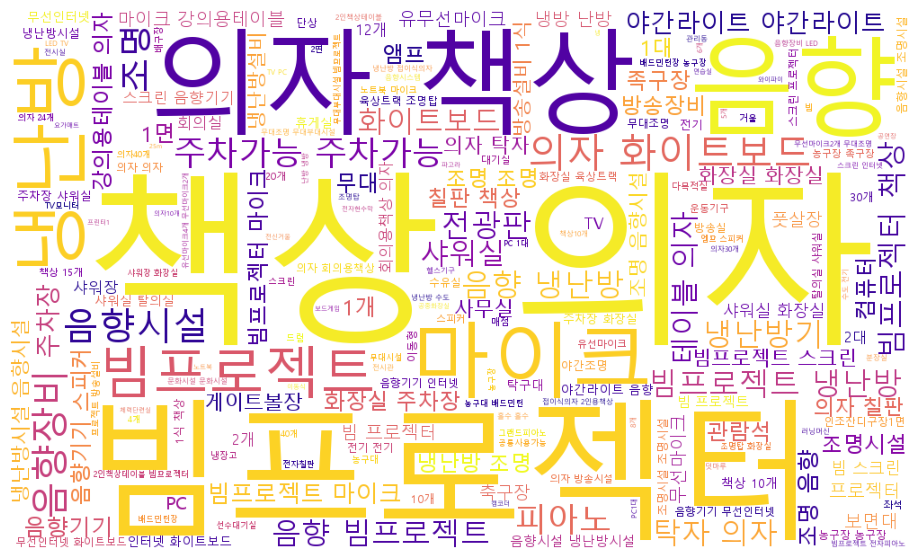

In [316]:
wordcloud(facility)

- '개발시설유형구분'컬럼 워드클라우드 표현

In [317]:
data['개방시설유형구분']

0         기타
1         기타
2       다목적실
3        체육관
4         기타
        ... 
7137     골프장
7138     회의실
7139     회의실
7140     회의실
7141     회의실
Name: 개방시설유형구분, Length: 7142, dtype: object

In [318]:
open_facility_type = data['개방시설유형구분'].tolist()

In [319]:
open_facility_type

['기타',
 '기타',
 '다목적실',
 '체육관',
 '기타',
 '체육관',
 '기타',
 '기타',
 '다목적실',
 '회의실',
 '회의실',
 '강의실',
 '강의실',
 '다목적실',
 '강의실',
 '회의실',
 '다목적실',
 '강의실',
 '강의실',
 '회의실',
 '회의실',
 '회의실',
 '다목적경기장',
 '기타',
 '테니스장',
 '테니스장',
 '회의실',
 '회의실',
 '강의실',
 '다목적실',
 '다목적실',
 '강의실',
 '강당',
 '회의실',
 '다목적실',
 '회의실',
 '다목적실',
 '회의실',
 '강의실',
 '강의실',
 '다목적실',
 '강의실',
 '강의실',
 '기타',
 '회의실',
 '기타',
 '기타(운동장)',
 '기타(탁구장)',
 '기타(생활체조장)',
 '전시실',
 '전시실',
 '기타(서원)',
 '체육관',
 '다목적경기장',
 '테니스장',
 '기타',
 '전시실',
 '기타',
 '전시실',
 '전시실',
 '테니스장',
 '기타',
 '기타',
 '기타',
 '골프장',
 '농구장',
 '배드맨턴장',
 '농구장',
 '다목적경기장',
 '체육관',
 '강당',
 '회의실',
 '회의실',
 '체육관',
 '회의실',
 '기타',
 '강당',
 '회의실',
 '기타',
 '회의실',
 '기타',
 '회의실',
 '회의실',
 '회의실',
 '회의실',
 '회의실',
 '회의실',
 '회의실',
 '회의실',
 '족구장',
 '다목적경기장',
 '다목적경기장',
 '다목적경기장',
 '다목적경기장',
 '배드맨턴장',
 '배드맨턴장',
 '기타',
 '기타',
 '족구장',
 '족구장',
 '족구장',
 '족구장',
 '족구장',
 '족구장',
 '테니스장',
 '테니스장',
 '테니스장',
 '테니스장',
 '테니스장',
 '테니스장',
 '족구장',
 '기타',
 '기타',
 '기타',
 '기타',
 '기타',
 '기타',
 '기타',
 '기타',
 '기타',
 '농구장',

In [320]:
open_facility_type = str(open_facility_type)

In [321]:
open_facility_type[ :500]

"['기타', '기타', '다목적실', '체육관', '기타', '체육관', '기타', '기타', '다목적실', '회의실', '회의실', '강의실', '강의실', '다목적실', '강의실', '회의실', '다목적실', '강의실', '강의실', '회의실', '회의실', '회의실', '다목적경기장', '기타', '테니스장', '테니스장', '회의실', '회의실', '강의실', '다목적실', '다목적실', '강의실', '강당', '회의실', '다목적실', '회의실', '다목적실', '회의실', '강의실', '강의실', '다목적실', '강의실', '강의실', '기타', '회의실', '기타', '기타(운동장)', '기타(탁구장)', '기타(생활체조장)', '전시실', '전시실', '기타(서원)', '체육관', '다목적경기장', '테니스장', '기타', '전시실', '기타', '전시실', '전시실', '테니스장', '기타', '기타', '기타', '골프장', '농구장', '배드맨턴장', '농구장',"

In [336]:
open_facility_type= open_facility_type.replace('+',',').replace(" ", ',').replace("'","").replace("(",",").replace(")",',')
#re.sub(패턴식, 대체할 문자, 텍스트)
re.sub("[\[\d\-nan\.\]]","", open_facility_type )

#[\[\d\-nan\.\]] -> 숫자와 점을 찾아라는 패턴식임. 
#맨 끝 대괄호 [ ] " 대괋 안 문자들 중 한개의 문자와 치치 
#\d: 는 숫자를 의미함 (0~9)
#\[: 기호 자체 - [
#\. \] : 기호 자체 - . 과 ]

open_facility_type = re.sub( ",{2,}" , ',', open_facility_type )
# {숫자,} :  숫자 이상만큼 반복

open_facility_type[ : 1000]

'[기타,기타,다목적실,체육관,기타,체육관,기타,기타,다목적실,회의실,회의실,강의실,강의실,다목적실,강의실,회의실,다목적실,강의실,강의실,회의실,회의실,회의실,다목적경기장,기타,테니스장,테니스장,회의실,회의실,강의실,다목적실,다목적실,강의실,강당,회의실,다목적실,회의실,다목적실,회의실,강의실,강의실,다목적실,강의실,강의실,기타,회의실,기타,기타,운동장,기타,탁구장,기타,생활체조장,전시실,전시실,기타,서원,체육관,다목적경기장,테니스장,기타,전시실,기타,전시실,전시실,테니스장,기타,기타,기타,골프장,농구장,배드맨턴장,농구장,다목적경기장,체육관,강당,회의실,회의실,체육관,회의실,기타,강당,회의실,기타,회의실,기타,회의실,회의실,회의실,회의실,회의실,회의실,회의실,회의실,족구장,다목적경기장,다목적경기장,다목적경기장,다목적경기장,배드맨턴장,배드맨턴장,기타,기타,족구장,족구장,족구장,족구장,족구장,족구장,테니스장,테니스장,테니스장,테니스장,테니스장,테니스장,족구장,기타,기타,기타,기타,기타,기타,기타,기타,기타,농구장,축구장,축구장,축구장,축구장,다목적경기장,다목적경기장,다목적경기장,다목적경기장,다목적경기장,다목적경기장,다목적경기장,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,기타,축구장,축구장,기타,광장,족구장,체육관,기타,축구장,배드맨턴장,농구장,축구장,풋살경기장,배드맨턴장,농구장,골프장,배드맨턴장,배드맨턴장,테니스장,족구장,테니스장,농구장,기타,기타,회의실,다목적실,강당,강당,강당,회의실,강당,다목적실,회의실,회의실,다목적경기장,축구장,축구장,족구장,풋살경기장,배드맨턴장,다목적경기장,축구장,풋살경기장,기타,다목적실,배드민턴장,탁구장,체육관,다목적실,배드민턴장,기타,전시실,다목적실,회의실,회의실,강당,회의실,족구장,족구장,족구장,족구장,족구장,족구장,다목적경기장,다목적경기장,다목적경기장,기타,다목적경기장,회의실,기타,기타,기타,기타,기타,기타,기타,기타,기타,체육관,테니스장,체육관,축구장,야구장

In [337]:
#pd의 Series로 변환 
#facility.split(',')
pd.Series(open_facility_type.split(',')).value_counts()

기타       2134
회의실      1040
강의실       555
다목적실      535
강당        529
         ... 
1세미나실       1
2세미나실       1
생활체조실       1
사랑방         1
회의실]        1
Name: count, Length: 70, dtype: int64

In [339]:
open_facility_type_cnt = pd.Series(open_facility_type.split(',')).value_counts()
open_facility_type_cnt.head(50)

기타         2134
회의실        1040
강의실         555
다목적실        535
강당          529
축구장         450
체육관         415
다목적경기장      317
테니스장        280
풋살경기장       193
족구장         170
전시실         132
야구장         109
농구장          97
배드맨턴장        96
골프장          64
게이트볼장        19
캠핑장          15
수영장           8
배구장           7
헬스장           6
배드민턴장         6
민원등기타         5
동아리실          4
대회의실          3
탁구장           3
소회의실          3
동아리방          3
1인미디어실        2
대강당           2
주민사랑방         2
국궁장           2
풋살장           2
[기타           1
광장            1
운동장           1
생활체조장         1
서원            1
교육실           1
민방위교육장        1
다목적체육관        1
당구장/탁구장       1
소극장           1
볼링장           1
마루공간          1
공예창작실         1
음향실           1
촬영            1
녹음            1
소프트테니스장       1
Name: count, dtype: int64

In [340]:
#커스텀 함수 만들기 
def a_wordcloud( data ) :
    word_draw = WordCloud(
    font_path = r"C:\Windows\Fonts\malgun.ttf",
    width = 1000, height = 600, #네모 박스의 크기 설정
    stopwords = ['기타','등','기타',''], #불용어(자주 사용되지만 큰 의미가 없는 단어)
    random_state =0,
    background_color='white',
    colormap = 'plasma'
        )

    word_draw.generate(open_facility_type)

    plt.figure(figsize = (15,7))
    plt.imshow(word_draw)
    plt.axis('off')#옆에 x,y축 닫
    plt.show()

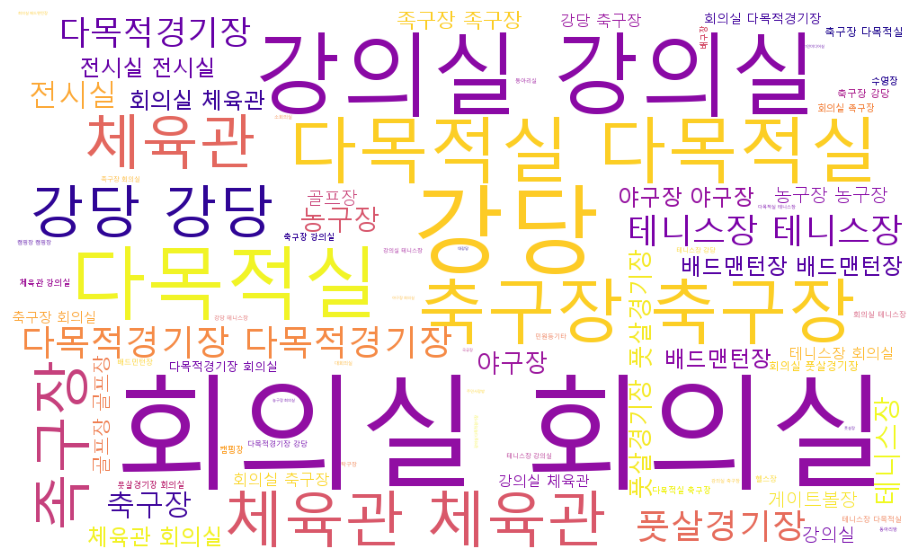

In [341]:
a_wordcloud(open_facility_type)

## Folium 지도 활용하기 

In [331]:
!pip install folium


   ---------------------------------------- 2/2 [folium]



In [332]:
import folium

In [342]:
#[위도, 경도]정보를 지도에 나타낸다
folium.Map(location =[37.558444, 126.926499])

In [346]:
m = folium.Map(location =[37.558444, 126.926499], zoom_start =20)

In [ ]:
#맵을 변수에 담고 내가 있는 곳 위치 찍기 

In [353]:
m = folium.Map(location =[37.558444, 126.926499], zoom_start =14)
folium.Marker([37.558444, 126.926499], tooltip = "LG DX SCHOOL").add_to(m)
m

In [357]:
#위도(latitude), 경도(Longtitude) 평균
long = data['경도'].mean()
lat = data['위도'].mean()
m = folium.Map(location =[lat, long], zoom_start =9)
m

In [361]:
#공공시설 정보 0번째
data.loc[0,'개방시설명']

'우리누리청소년문화센터 도서관'

In [364]:
#0번쩨 공공시설 위도
data.loc[0,'위도']

np.float64(35.240104)

In [365]:
#0번째 공공시설 경도
data.loc[0,'경도']

np.float64(128.590761)

In [ ]:
data.index[:30]

In [368]:
m = folium.Map(location =[lat, long], zoom_start =9)

for i in data.index[ :30]:
    tooltip = data.loc[i,'개방시설명']
    lat = data.loc[i,'위도']
    long = data.loc[i,'경도']

    folium.Marker([lat, long], tooltip = tooltip).add_to(m)

m

# 서울특별시의 공공기관 위치 보기

In [376]:
# 서울특별시 데이터 가져오기 
seoul_pub = data[data['시도']=='서울특별시']
seoul_pub

,개방시설명,개방장소명,개방시설유형구분,휴관일,평일운영시작시각,평일운영종료시각,주말운영시작시각,주말운영종료시각,유료사용여부,사용기준시간,사용료,초과사용단위시간,초과사용료,수용가능인원수,면적,부대시설정보,신청방법구분,시설사진정보,소재지도로명주소,관리기관명,담당부서명,사용안내전화번호,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명,시도,시군구
11,강동구 성내2동 자치회관 새미실(지하1층),성내2동주민센터,강의실,공휴일,09:00,21:00,09:00,18:00,Y,1.0,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강동구 풍성로37가길 62,서울특별시 강동구청,성내2동,NaN,NaN,37.532430,127.129528,2023-08-18,3240000,서울특별시 강동구,서울특별시,강동구
12,강동구 성내3동 자치회관 제1강의실(2층),성내3동주민센터,강의실,공휴일,09:00,21:00,09:00,18:00,Y,1.0,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강동구 풍성로37가길 62,서울특별시 강동구청,성내3동,NaN,NaN,37.532430,127.129528,2023-08-18,3240000,서울특별시 강동구,서울특별시,강동구
13,강동구 성내3동 자치회관 다목적실(지하1층),성내3동주민센터,다목적실,공휴일,09:00,21:00,09:00,18:00,Y,1.0,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강동구 강동대로53길 76,서울특별시 강동구청,성내3동,NaN,NaN,37.526003,127.132873,2023-08-18,3240000,서울특별시 강동구,서울특별시,강동구
14,강동구 성내3동 자치회관 제2강의실(2층),성내3동주민센터,강의실,공휴일,09:00,21:00,09:00,18:00,Y,1.0,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강동구 강동대로53길 76,서울특별시 강동구청,성내3동,NaN,NaN,37.526003,127.132873,2023-08-18,3240000,서울특별시 강동구,서울특별시,강동구
15,강동구 길동 주민센터 회의실(3층),길동주민센터,회의실,공휴일,09:00,21:00,09:00,18:00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강동구 강동대로53길 76,서울특별시 강동구청,길동,NaN,NaN,37.526042,127.132884,2023-08-18,3240000,서울특별시 강동구,서울특별시,강동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,응봉동 주민센터 다목적실,응봉동 주민센터,다목적실,연중무휴,16:00,18:00,09:00,13:00,Y,2.0,20000,1.0,10000,50.0,138,NaN,인터넷 예약,NaN,서울특별시 성동구 독서당로 424(응봉동),서울특별시 성동구청,응봉동 주민센터,02-2286-7335,http://yeyak.seoul.go.kr,37.553139,127.033402,2025-06-18,3030000,서울특별시 성동구,서울특별시,성동구
7063,응봉동 주민센터 소회의실,응봉동 주민센터,회의실,연중무휴,13:00,20:00,09:00,13:00,Y,2.0,20000,1.0,10000,18.0,22,NaN,인터넷 예약,NaN,서울특별시 성동구 독서당로 424(응봉동),서울특별시 성동구청,응봉동 주민센터,02-2286-7335,http://yeyak.seoul.go.kr,37.553139,127.033402,2025-06-18,3030000,서울특별시 성동구,서울특별시,성동구
7064,행당제1동 주민센터 공부방,행당제1동 주민센터,강의실,토+일,10:00,21:00,00:00,00:00,Y,2.0,20000,1.0,10000,12.0,20,NaN,인터넷 예약,NaN,서울특별시 성동구 고산자로10길 18(행당동),서울특별시 성동구청,행당제1동 주민센터,02-2286-7284,http://yeyak.seoul.go.kr,37.558510,127.036152,2025-06-18,3030000,서울특별시 성동구,서울특별시,성동구
7065,행당제1동 주민센터 다목적실,행당제1동 주민센터,다목적실,토+일,09:00,21:00,00:00,00:00,Y,2.0,20000,1.0,10000,40.0,127,NaN,인터넷 예약,NaN,서울특별시 성동구 고산자로10길 18(행당동),서울특별시 성동구청,행당제1동 주민센터,02-2286-7284,http://yeyak.seoul.go.kr,37.558510,127.036152,2025-06-18,3030000,서울특별시 성동구,서울특별시,성동구


In [378]:
#서울 공공기관의 위도, 경도 평균
s_lat = seoul_pub['위도'].mean()
s_long = seoul_pub['경도'].mean()

In [380]:
m = folium.Map(location =[s_lat, s_long], zoom_start =12)

for i in seoul_pub.index[ :30]:
    tooltip = seoul_pub.loc[i,'개방시설명']
    lat = seoul_pub.loc[i,'위도']
    long = seoul_pub.loc[i,'경도']

    folium.Marker([lat, long], tooltip = tooltip).add_to(m)
m